In [1]:
import os 
import pathlib 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import matplotlib.image as mpimg
import random
import cv2
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Activation, Conv2D, MaxPool2D, Flatten, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping

from google.colab import files
from sklearn.metrics import classification_report,confusion_matrix

In [8]:
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"vikashbisht","key":"2eb21d4620836b61037f294556412837"}'}

In [9]:
os.environ["KAGGLE_CONFIG_DIR"] = "/content"

In [10]:
!kaggle datasets download -d prithwirajmitra/covid-face-mask-detection-dataset

 93% 193M/207M [00:01<00:00, 115MB/s]
100% 207M/207M [00:01<00:00, 109MB/s]


In [11]:
!unzip \*.zip

Archive:  covid-face-mask-detection-dataset.zip
  inflating: New Masks Dataset/Test/Mask/2070.jpg  
  inflating: New Masks Dataset/Test/Mask/2072.jpg  
  inflating: New Masks Dataset/Test/Mask/2083.jpg  
  inflating: New Masks Dataset/Test/Mask/2085.jpg  
  inflating: New Masks Dataset/Test/Mask/2086.jpg  
  inflating: New Masks Dataset/Test/Mask/2110.jpg  
  inflating: New Masks Dataset/Test/Mask/2113.jpg  
  inflating: New Masks Dataset/Test/Mask/2114.jpeg  
  inflating: New Masks Dataset/Test/Mask/2130.jpg  
  inflating: New Masks Dataset/Test/Mask/2132.jpg  
  inflating: New Masks Dataset/Test/Mask/2135.jpg  
  inflating: New Masks Dataset/Test/Mask/2154.png  
  inflating: New Masks Dataset/Test/Mask/2158.png  
  inflating: New Masks Dataset/Test/Mask/2159.png  
  inflating: New Masks Dataset/Test/Mask/2160.png  
  inflating: New Masks Dataset/Test/Mask/2170.png  
  inflating: New Masks Dataset/Test/Mask/2172.png  
  inflating: New Masks Dataset/Test/Mask/2173.png  
  inflating: Ne

In [12]:
for dirpath,dirnames,filenames in os.walk("/content/New Masks Dataset"):
    print(f"there are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.") #print the number of directories and images in each directory

there are 3 directories and 0 images in '/content/New Masks Dataset'.
there are 2 directories and 0 images in '/content/New Masks Dataset/Train'.
there are 0 directories and 300 images in '/content/New Masks Dataset/Train/Mask'.
there are 0 directories and 300 images in '/content/New Masks Dataset/Train/Non Mask'.
there are 2 directories and 0 images in '/content/New Masks Dataset/Validation'.
there are 0 directories and 153 images in '/content/New Masks Dataset/Validation/Mask'.
there are 0 directories and 153 images in '/content/New Masks Dataset/Validation/Non Mask'.
there are 2 directories and 0 images in '/content/New Masks Dataset/Test'.
there are 0 directories and 50 images in '/content/New Masks Dataset/Test/Mask'.
there are 0 directories and 50 images in '/content/New Masks Dataset/Test/Non Mask'.


In [13]:
def view_image(target_dir, target_class): #function to view images
    target_folder = target_dir+target_class
    random_image = random.sample(os.listdir(target_folder),1)
    print(random_image)
    img = mpimg.imread(target_folder+"/"+ random_image[0])
    plt.imshow(img)
    plt.title(target_class)
    plt.axis("off")
    print(f"image shape {img.shape}")
    
    return img

['160.jpg']
image shape (208, 165, 3)


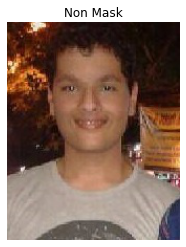

In [14]:
img = view_image("/content/New Masks Dataset/Train/","Non Mask")

['0128.png']
image shape (548, 710, 3)


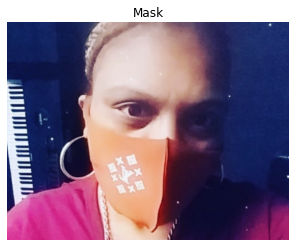

In [15]:
img = view_image("/content/New Masks Dataset/Train/","Mask")

In [16]:
data=[] #create an empty list
labels=[] #create an empty list
no_mask=os.listdir("/content/New Masks Dataset/Train/Non Mask/") #create a list of all the images in the directory
for a in no_mask:

    image = cv2.imread("/content/New Masks Dataset/Train/Non Mask/"+a,) #read the image
    image = cv2.resize(image, (224, 224))


    data.append(image)
    labels.append(0)

In [17]:
mask=os.listdir("/content/New Masks Dataset/Train/Mask/")
for a in mask:

    image = cv2.imread("/content/New Masks Dataset/Train/Mask/"+a,)
    image = cv2.resize(image, (224, 224))


    data.append(image)
    labels.append(1)

In [18]:
data = np.array(data) / 255.0 #convert the list to an array and scale the pixel values to be between 0 and 1
labels = np.array(labels) #convert the list to an array

In [20]:
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42,shuffle=True,
                                                    stratify = labels)

In [21]:
base_model = tf.keras.applications.MobileNet(input_shape=[224,224,3], weights = "imagenet", include_top=False) #create the base model from the pre-trained model MobileNet

base_model.trainable = False #freeze the base model

# for layer in base_model.layers[30:]:
#   layer.trainable = False
    

model = Flatten()(base_model.output) #flatten the output layer to 1 dimension
model = Dense(units=256, activation="relu")(model) #add a fully connected layer with 256 hidden units and ReLU activation
model = Dense(units=64, activation="relu")(model) #add a fully connected layer with 64 hidden units and ReLU activation
prediction_layer = Dense(units=1, activation="sigmoid")(model) #add a final sigmoid layer for classification

model = Model(inputs = base_model.input, outputs = prediction_layer) #create the model
model.compile(optimizer='SGD',loss='binary_crossentropy',metrics=['accuracy']) #compile the model

17225924/17225924 [==============================] - 0s 0us/step


In [22]:
model.fit(X_train, y_train, epochs=15, batch_size=32)

Epoch 1/15
15/15 [==============================] - 9s 38ms/step - loss: 0.8947 - accuracy: 0.8188
Epoch 2/15
15/15 [==============================] - 1s 39ms/step - loss: 0.0241 - accuracy: 0.9917
Epoch 3/15
15/15 [==============================] - 1s 37ms/step - loss: 0.0078 - accuracy: 0.9979
Epoch 4/15
15/15 [==============================] - 1s 38ms/step - loss: 0.0034 - accuracy: 1.0000
Epoch 5/15
15/15 [==============================] - 1s 39ms/step - loss: 0.0024 - accuracy: 1.0000
Epoch 6/15
15/15 [==============================] - 1s 38ms/step - loss: 0.0018 - accuracy: 1.0000
Epoch 7/15
15/15 [==============================] - 1s 39ms/step - loss: 0.0015 - accuracy: 1.0000
Epoch 8/15
15/15 [==============================] - 1s 38ms/step - loss: 0.0013 - accuracy: 1.0000
Epoch 9/15
15/15 [==============================] - 1s 39ms/step - loss: 0.0011 - accuracy: 1.0000
Epoch 10/15
15/15 [==============================] - 1s 39ms/step - loss: 9.6263e-04 - accuracy: 1.0000
Epoch

In [23]:
predictions = model.predict(X_test)

predict=[]

for i in range(len(predictions)):
    if predictions[i][0]>0.5:
        predict.append(1)
    else:
        predict.append(0)


4/4 [==============================] - 1s 148ms/step


In [24]:
pd.DataFrame(confusion_matrix(y_test, predict), columns= ["No Mask", "Mask"], index = ["No Mask", "Mask"])

,No Mask,Mask
No Mask,60,0
Mask,0,60


In [25]:
model_name = "/content/mask_detection_vibi67_100.h5"
tf.keras.models.save_model(model, model_name)